In [21]:
#Loading the required packages
import pandas as pd
import numpy as np
import re
import string

import spacy
nlp = spacy.load('en')

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_colwidth', 200)

In [22]:
data = pd.read_pickle("contents.pkl")
data.head()

,title,original_content
number,,
Article 1,Pier 1 appoints interim CFO amid growing financial loss,"\n\nPier 1 on Wednesday reported that fourth quarter net sales fell 19.5% to $412.5 million from $512.2 million in the year-ago quarter. Comp store sales in the quarter decreased 13.7%, which the ..."
Article 2,Family Dollar to close nearly 400 stores,\nDollar Tree on Wednesday announced that up to 390 Family Dollar stores will close in 2019. The company closed 84 Family Dollar stores in the fourth quarter.\nThe retailer also reported consolida...
Article 3,Having to share personal data turns consumers away from loyalty programs study says,"\nAccording to a new Harris Poll survey, 71% of Americans would be less likely to join a rewards program that collects personal information, such as address, account information and more, with 27%..."
Article 4,Walgreens taps Narvar for online pickup returns in 8K stores,\n\np.p1 {margin: 0.0px 0.0px 35.0px 0.0px; line-height: 28.0px; font: 16.0px Helvetica; color: #2a2a2a; -webkit-text-stroke: #2a2a2a; background-color: #ffffff}\r\nspan.s1 {font-kerning: none}\r\...
Article 5,TechStyle claims more than 5M active members,"\n\nTechStyle Fashion Group, which operates ShoeDazzle, JustFab, FabKids, Fabletics and Savage X Fenty, now has more than five million active members, according to a TechStyle press release.\n\n\..."


# Data Cleaning

In [23]:
'''
#Remove tags, whitespaces, newlines, punctuations and digits
'''
def clean_text1(doc):
    doc = re.sub(r'\{[^)]*\}', '', doc) #Removes tags
    doc = re.sub(r'\w*\d\w*', '', doc) #Remove numbers
    doc = re.sub(r'[%s]'% re.escape(string.punctuation), '', doc)#Removes punctuations
    doc = re.sub(r'\s+', ' ', doc) #Removes whitespaces
    doc = re.sub(r'^.p', '', doc) #Removes extra first character 'p' in specific rows
    doc = doc[1:].lstrip() #Removes leading whitespace
    return doc

data['content'] = data['original_content'].apply(lambda x: clean_text1(x))

data1 = pd.DataFrame([data['title'], data['original_content'], data['content']]).T
data1.head()

,title,original_content,content
number,,,
Article 1,Pier 1 appoints interim CFO amid growing financial loss,"\n\nPier 1 on Wednesday reported that fourth quarter net sales fell 19.5% to $412.5 million from $512.2 million in the year-ago quarter. Comp store sales in the quarter decreased 13.7%, which the ...",Pier on Wednesday reported that fourth quarter net sales fell to million from million in the yearago quarter Comp store sales in the quarter decreased which the company attributes partially to the...
Article 2,Family Dollar to close nearly 400 stores,\nDollar Tree on Wednesday announced that up to 390 Family Dollar stores will close in 2019. The company closed 84 Family Dollar stores in the fourth quarter.\nThe retailer also reported consolida...,Dollar Tree on Wednesday announced that up to Family Dollar stores will close in The company closed Family Dollar stores in the fourth quarter The retailer also reported consolidated net sales for...
Article 3,Having to share personal data turns consumers away from loyalty programs study says,"\nAccording to a new Harris Poll survey, 71% of Americans would be less likely to join a rewards program that collects personal information, such as address, account information and more, with 27%...",According to a new Harris Poll survey of Americans would be less likely to join a rewards program that collects personal information such as address account information and more with saying they w...
Article 4,Walgreens taps Narvar for online pickup returns in 8K stores,\n\np.p1 {margin: 0.0px 0.0px 35.0px 0.0px; line-height: 28.0px; font: 16.0px Helvetica; color: #2a2a2a; -webkit-text-stroke: #2a2a2a; background-color: #ffffff}\r\nspan.s1 {font-kerning: none}\r\...,Customer experience platform Narvar and Walgreens are working together to provide package pickup and returns at more than Walgreens locations that have FedEx OnSite services Its the first offering...
Article 5,TechStyle claims more than 5M active members,"\n\nTechStyle Fashion Group, which operates ShoeDazzle, JustFab, FabKids, Fabletics and Savage X Fenty, now has more than five million active members, according to a TechStyle press release.\n\n\...",TechStyle Fashion Group which operates ShoeDazzle JustFab FabKids Fabletics and Savage X Fenty now has more than five million active members according to a TechStyle press release Program members ...


In [24]:
#Using spaCy
data1['tokenized_content'] = data1['content'].apply(nlp)


#Adding commonly occuring words in the articles to the existing STOP_WORDS list
from spacy.lang.en.stop_words import STOP_WORDS
nlp.Defaults.stop_words |= {"company", "companies", "companys", "Company", "Companies", "Companys", "according", "According", 
                            "Press", "press", "Release", "release", "store", "stores", "Store", "Stores", "retail", "Retail",
                           "retailer", "Retailer", "retailers", "Retailers"}
len(STOP_WORDS)

334

In [25]:
'''
#Tokenizing content along with lemmatization and removing stopwords
'''
tokens = []

for doc in nlp.pipe(data1['tokenized_content'].astype('unicode').values, batch_size=50, n_threads=3):
    if doc.is_parsed:
        tokens.append([n.lemma_ for n in doc if n.is_stop == False])      
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)

        
data1['clean_list_tokenized_content'] = tokens
data1['clean_string_tokenized_content'] = data1['clean_list_tokenized_content'].apply(', '.join) #Converting list to strings

In [26]:
data1.head()

,title,original_content,content,tokenized_content,clean_list_tokenized_content,clean_string_tokenized_content
number,,,,,,
Article 1,Pier 1 appoints interim CFO amid growing financial loss,"\n\nPier 1 on Wednesday reported that fourth quarter net sales fell 19.5% to $412.5 million from $512.2 million in the year-ago quarter. Comp store sales in the quarter decreased 13.7%, which the ...",Pier on Wednesday reported that fourth quarter net sales fell to million from million in the yearago quarter Comp store sales in the quarter decreased which the company attributes partially to the...,"(Pier, on, Wednesday, reported, that, fourth, quarter, net, sales, fell, to, million, from, million, in, the, yearago, quarter, Comp, store, sales, in, the, quarter, decreased, which, the, company...","[pier, Wednesday, report, fourth, quarter, net, sale, fall, million, million, yearago, quarter, Comp, sale, quarter, decrease, attribute, partially, shift, holiday, selling, day, include, fourth, ...","pier, Wednesday, report, fourth, quarter, net, sale, fall, million, million, yearago, quarter, Comp, sale, quarter, decrease, attribute, partially, shift, holiday, selling, day, include, fourth, q..."
Article 2,Family Dollar to close nearly 400 stores,\nDollar Tree on Wednesday announced that up to 390 Family Dollar stores will close in 2019. The company closed 84 Family Dollar stores in the fourth quarter.\nThe retailer also reported consolida...,Dollar Tree on Wednesday announced that up to Family Dollar stores will close in The company closed Family Dollar stores in the fourth quarter The retailer also reported consolidated net sales for...,"(Dollar, Tree, on, Wednesday, announced, that, up, to, Family, Dollar, stores, will, close, in, The, company, closed, Family, Dollar, stores, in, the, fourth, quarter, The, retailer, also, reporte...","[dollar, Tree, Wednesday, announce, Family, Dollar, close, close, Family, Dollar, fourth, quarter, report, consolidated, net, sale, week, fourth, quarter, fall, billion, billion, previous, year, w...","dollar, Tree, Wednesday, announce, Family, Dollar, close, close, Family, Dollar, fourth, quarter, report, consolidated, net, sale, week, fourth, quarter, fall, billion, billion, previous, year, we..."
Article 3,Having to share personal data turns consumers away from loyalty programs study says,"\nAccording to a new Harris Poll survey, 71% of Americans would be less likely to join a rewards program that collects personal information, such as address, account information and more, with 27%...",According to a new Harris Poll survey of Americans would be less likely to join a rewards program that collects personal information such as address account information and more with saying they w...,"(According, to, a, new, Harris, Poll, survey, of, Americans, would, be, less, likely, to, join, a, rewards, program, that, collects, personal, information, such, as, address, account, information,...","[new, Harris, Poll, survey, Americans, likely, join, reward, program, collect, personal, information, address, account, information, say, likely, join, additionally, reveal, likely, join, program,...","new, Harris, Poll, survey, Americans, likely, join, reward, program, collect, personal, information, address, account, information, say, likely, join, additionally, reveal, likely, join, program, ..."
Article 4,Walgreens taps Narvar for online pickup returns in 8K stores,\n\np.p1 {margin: 0.0px 0.0px 35.0px 0.0px; line-height: 28.0px; font: 16.0px Helvetica; color: #2a2a2a; -webkit-text-stroke: #2a2a2a; background-color: #ffffff}\r\nspan.s1 {font-kerning: none}\r\...,Customer experience platform Narvar and Walgreens are working together to provide package pickup and returns at more than Walgreens locations that have FedEx OnSite services Its the first offering...,"(Customer, experience, platform, Narvar, and, Walgreens, are, working, together, to, provide, package, pickup, and, returns, at, more, than, Walgreens, locations, that, hav

In [27]:
#Let's pickle it for later use
data1.to_pickle("corpus.pkl")

In [29]:
# We are going to create a document-term matrix using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=False, stop_words='english')
#data_cv = cv.fit_transform(data1['clean_list_tokenized_content'].apply(','.join))
data_cv = cv.fit_transform(data1['clean_string_tokenized_content'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data1.index
data_dtm.head()

,AI,AR,ARVR,Aaron,Accenture,Ace,AceHardwarecom,Adam,Adidas,Advisors,...,work,workout,workplace,world,worth,write,writedown,year,yearago,young
number,,,,,,,,,,,,,,,,,,,,,
Article 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,0
Article 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
Article 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Article 4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Article 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
#Let's pickle it for later use
data_dtm.to_pickle("document_term_matrix.pkl")

# Data Visualization

<b>Find the top words used in each article</b>

In [10]:
vizdata = data_dtm.T

top_words = {}
for c in vizdata.columns:
    top = vizdata[c].sort_values(ascending = False).head(10)
    top_words[c] = list(zip(top.index, top.values))

In [11]:
vizdata.shape

(1565, 56)

In [12]:
#Using WordCloud to visualize the top words
from wordcloud import WordCloud

wc = WordCloud(background_color='white', colormap='Dark2', max_font_size=150, random_state=42)

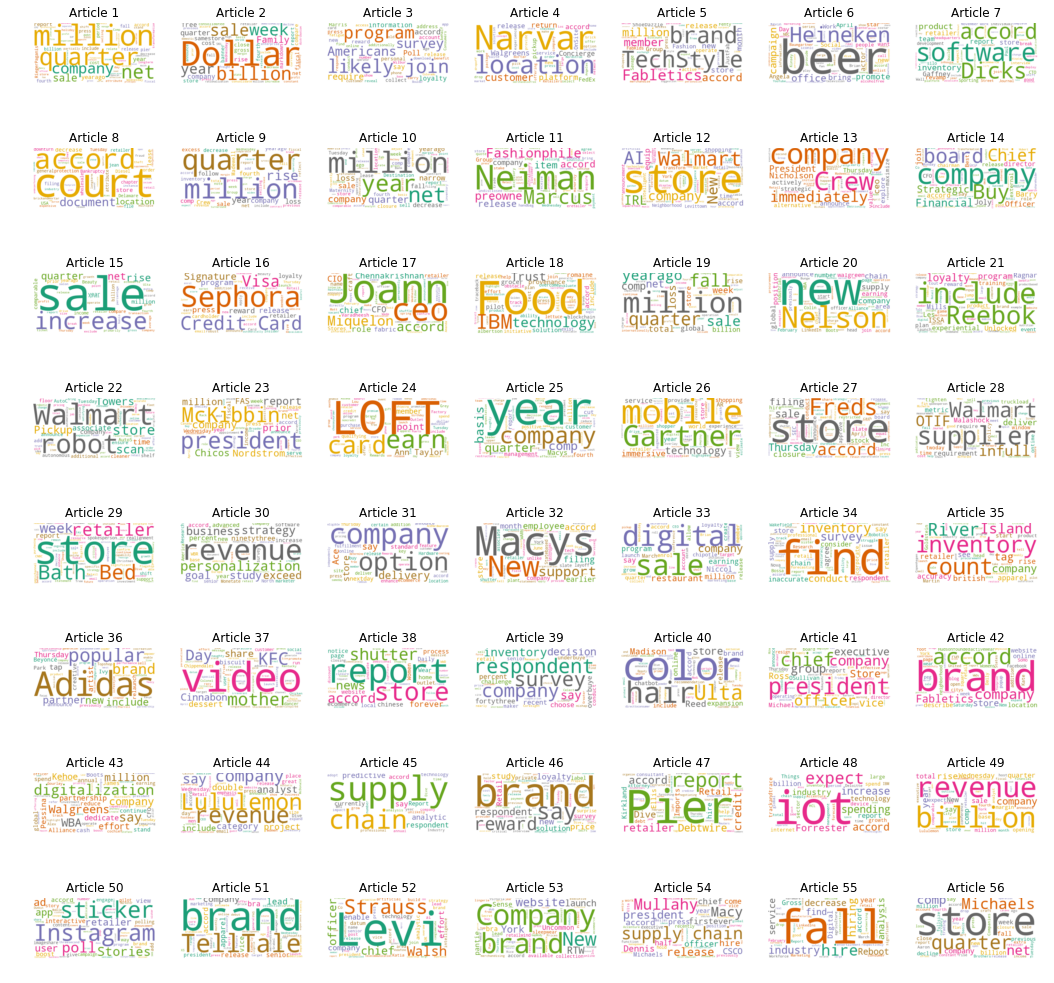

In [13]:
plt.rcParams['figure.figsize'] = [18,18]

number = [i for i in data1.index]

# Create subplots for each article
for index, article in enumerate(vizdata.columns):
    wc.generate(data1['clean_string_tokenized_content'][article])
    plt.subplot(8,7,index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(number[index]) 
    
plt.show()

<b>We need to remove the company names and other Named Entities to understand the context of each article.</b>

In [14]:
#Using only NOUNS to visualize
tokens = []

for doc in nlp.pipe(data1['content'].astype('unicode').values, batch_size=50, n_threads=3):
    if doc.is_parsed:
        tokens.append([n.lemma_ for n in doc if n.is_stop == False and n.pos_ == "NOUN"])      
    else:
        tokens.append(None)

data1['content_NN'] = tokens                  
data1['content_NN'] = data1['content_NN'].apply(', '.join) #Converting list to strings

In [15]:
top_words = {}
for c in vizdata.columns:
    top = vizdata[c].sort_values(ascending = False).head(10)
    top_words[c] = list(zip(top.index, top.values))

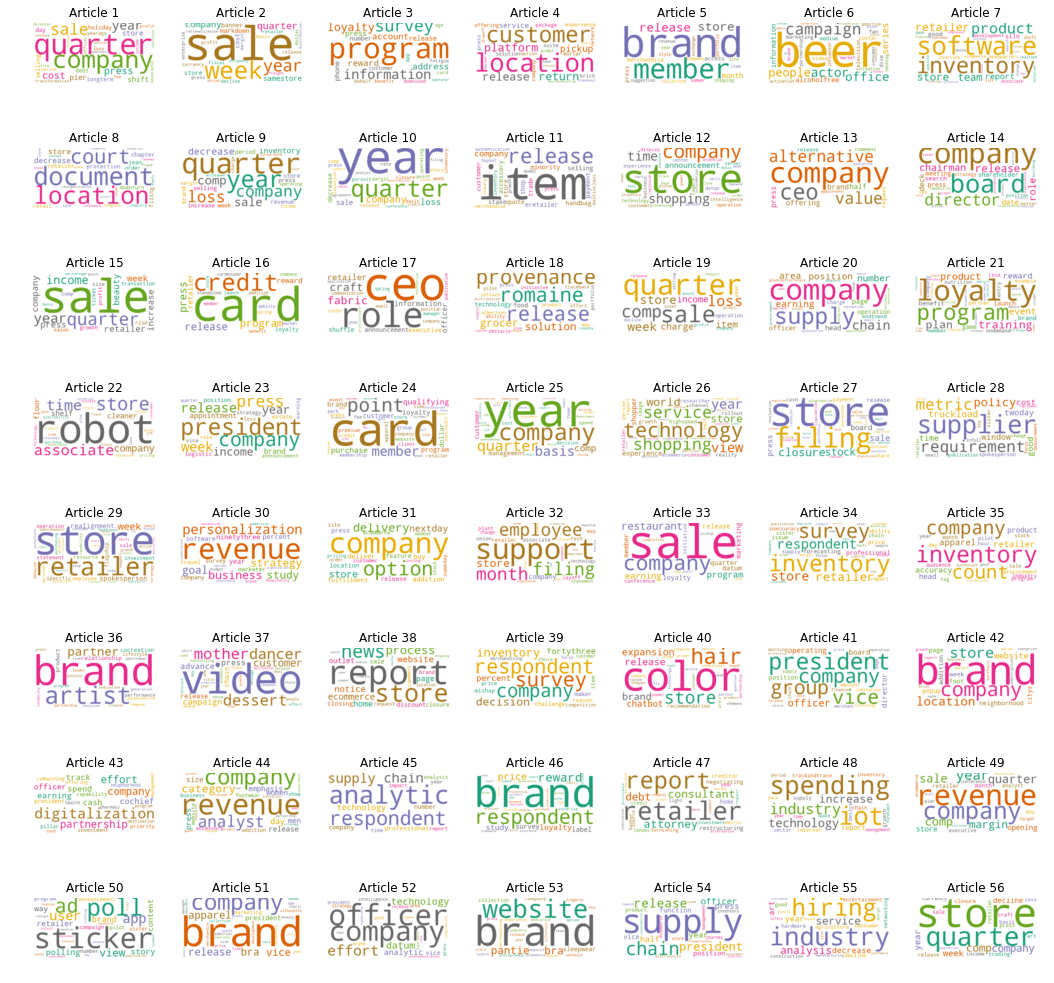

In [16]:
plt.rcParams['figure.figsize'] = [18,18]

# Create subplots for each article
for index, article in enumerate(vizdata.columns):
    wc.generate(data1['content_NN'][article])
    plt.subplot(8,7,index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(number[index]) 
    
plt.show()